# DeepLabCut Toolbox - demo for post processing

https://github.com/AlexEMG/DeepLabCut

In [1]:
# Importing the toolbox (takes several seconds)
import pandas as pd
from pathlib import Path
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
# this is example data from the public project: https://github.com/AlexEMG/DeepLabCut/tree/master/examples/openfield-Pranav-2018-10-30
video='postura.mp4'
DLCscorer='DLC_resnet50_Ic-posturajul12shuffle1_186500'

dataname = str(Path(video).stem) + DLCscorer + '.h5'

#loading output of DLC
Dataframe = pd.read_hdf(os.path.join(dataname))


In [4]:
#Let's have a look at the data:

#these structures are awesome to manipulate, how -->> see pandas https://pandas.pydata.org/pandas-docs/stable/index.html
Dataframe.head()

scorer    DLC_resnet50_Ic-posturajul12shuffle1_186500                        \
bodyparts                                      orelha                         
coords                                              x          y likelihood   
0                                          350.545441  42.781219        1.0   
1                                          350.549042  42.621078        1.0   
2                                          350.097595  42.401073        1.0   
3                                          349.937225  42.032906        1.0   
4                                          349.713562  41.469582        1.0   

scorer                                                                         \
bodyparts       nariz                            queixo                         
coords              x          y likelihood           x          y likelihood   
0          381.886932  50.514023        1.0  371.197449  74.570953        1.0   
1          382.076019  50.179401        1.0  371.171082  74.601990        1.0   
2          382.288269  50.116074        1.0  371.263489  74.546082        1.0   
3          382.523834  50.109360        1.0  371.425415  74.502037        1.0   
4          382.725800  50.011028        1.0  371.404358  74.460175        1.0   

scorer                                                                         
bodyparts    cervical                             ombro                        
coords              x          y likelihood           x          y likelihood  
0          326.279114  65.085396        1.0  332.052551  85.110222        1.0  
1          326.443604  64.915573        1.0  332.279663  84.752510        1.0  
2          326.477539  64.882568        1.0  332.149475  84.843948        1.0  
3          326.656128  64.758339        1.0  332.271027  84.756126        1.0  
4          326.749756  64.723450        1.0  332.284088  84.714394        1.0

In [5]:
Dataframe

scorer    DLC_resnet50_Ic-posturajul12shuffle1_186500                        \
bodyparts                                      orelha                         
coords                                              x          y likelihood   
0                                          350.545441  42.781219        1.0   
1                                          350.549042  42.621078        1.0   
2                                          350.097595  42.401073        1.0   
3                                          349.937225  42.032906        1.0   
4                                          349.713562  41.469582        1.0   
...                                               ...        ...        ...   
5119                                       319.460236  44.001122        1.0   
5120                                       319.510071  43.982201        1.0   
5121                                       319.520660  44.005741        1.0   
5122                                       319.464081  43.958778        1.0   
5123                                       319.429535  43.995987        1.0   

scorer                                                                         \
bodyparts       nariz                            queixo                         
coords              x          y likelihood           x          y likelihood   
0          381.886932  50.514023        1.0  371.197449  74.570953        1.0   
1          382.076019  50.179401        1.0  371.171082  74.601990        1.0   
2          382.288269  50.116074        1.0  371.263489  74.546082        1.0   
3          382.523834  50.109360        1.0  371.425415  74.502037        1.0   
4          382.725800  50.011028        1.0  371.404358  74.460175        1.0   
...               ...        ...        ...         ...        ...        ...   
5119       353.650330  55.966774        1.0  339.275391  76.585358        1.0   
5120       353.741882  56.111729        1.0  339.350800  76.712906        1.0   
5121       353.878052  56.346359        1.0  339.242889  76.741982        1.0   
5122       353.824249  56.339352        1.0  339.244568  76.777115        1.0   
5123       353.775848  55.607117        1.0  339.244751  76.730949        1.0   

scorer                                                                         
bodyparts    cervical                             ombro                        
coords              x          y likelihood           x          y likelihood  
0          326.279114  65.085396        1.0  332.052551  85.110222        1.0  
1          326.443604  64.915573        1.0  332.279663  84.752510        1.0  
2          326.477539  64.882568        1.0  332.149475  84.843948        1.0  
3          326.656128  64.758339        1.0  332.271027  84.756126        1.0  
4          326.749756  64.723450        1.0  332.284088  84.714394        1.0  
...               ...        ...        ...         ...        ...        ...  
5119       295.216095  66.676079        1.0  298.919098  86.773758        1.0  
5120       295.304230  66.642662        1.0  298.954620  86.778526        1.0  
5121       295.189972  67.455582        1.0  299.293610  86.407959        1.0  
5122       295.226685  67.468956        1.0  299.333466  86.382042        1.0  
5123       295.248383  67.512909        1.0  299.287415  86.491776        1.0  

[5124 rows x 15 columns]

In [15]:
## Gerando base de dados do vídeo
Dataframe.to_csv('basededados-postura-cervical.csv')

In [7]:
# The plotting functions below are put here for simplicity and so that the user can edit them. Note that they 
# (or variants thereof) are in fact in standard DLC and accessible via:

## import deeplabcut
## deeplabcut.utils.plotting.PlottingResults?

In [8]:
def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

def Histogram(vector,color,bins):
    dvector=np.diff(vector)
    dvector=dvector[np.isfinite(dvector)]
    plt.hist(dvector,color=color,histtype='step',bins=bins)

def PlottingResults(Dataframe,bodyparts2plot,alphavalue=.2,pcutoff=.5,colormap='jet',fs=(4,3)):
    ''' Plots poses vs time; pose x vs pose y; histogram of differences and likelihoods.'''
    plt.figure(figsize=fs)
    colors = get_cmap(len(bodyparts2plot),name = colormap)
    scorer=Dataframe.columns.get_level_values(0)[0] #you can read out the header to get the scorer name!

    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
        plt.plot(Dataframe[scorer][bp]['x'].values[Index],Dataframe[scorer][bp]['y'].values[Index],'.',color=colors(bpindex),alpha=alphavalue)

    plt.gca().invert_yaxis()

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    #plt.savefig(os.path.join(tmpfolder,"trajectory"+suffix))
    #COMENTAR DAQUI PARA BAIXO
    plt.figure(figsize=fs)
    Time=np.arange(np.size(Dataframe[scorer][bodyparts2plot[0]]['x'].values))

    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
        plt.plot(Time[Index],Dataframe[scorer][bp]['x'].values[Index],'--',color=colors(bpindex),alpha=alphavalue)
        plt.plot(Time[Index],Dataframe[scorer][bp]['y'].values[Index],'-',color=colors(bpindex),alpha=alphavalue)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.xlabel('Frame index')
    plt.ylabel('X and y-position in pixels')
    #plt.savefig(os.path.join(tmpfolder,"plot"+suffix))

    plt.figure(figsize=fs)
    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
        plt.plot(Time,Dataframe[scorer][bp]['likelihood'].values,'-',color=colors(bpindex),alpha=alphavalue)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.xlabel('Frame index')
    plt.ylabel('likelihood')

    #plt.savefig(os.path.join(tmpfolder,"plot-likelihood"+suffix))

    plt.figure(figsize=fs)
    bins=np.linspace(0,np.amax(Dataframe.max()),100)

    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values < pcutoff
        X=Dataframe[scorer][bp]['x'].values
        X[Index]=np.nan
        Histogram(X,colors(bpindex),bins)
        Y=Dataframe[scorer][bp]['x'].values
        Y[Index]=np.nan
        Histogram(Y,colors(bpindex),bins)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.ylabel('Count')
    plt.xlabel('DeltaX and DeltaY')
    
    #plt.savefig(os.path.join(tmpfolder,"hist"+suffix))

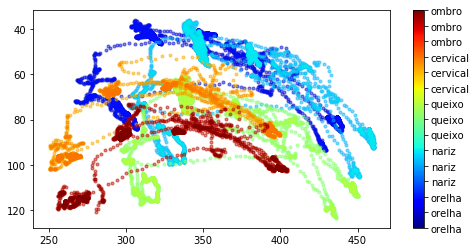

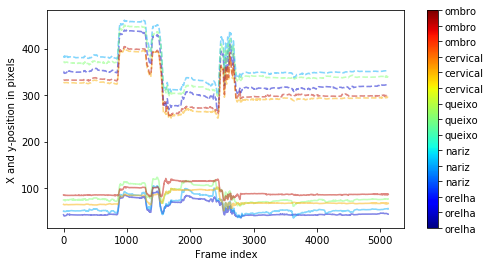

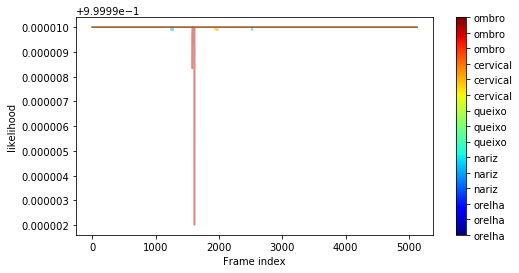

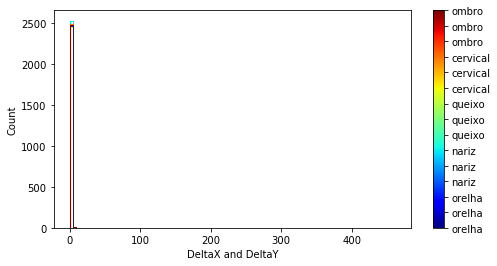

In [9]:
bodyparts=Dataframe.columns.get_level_values(1) #you can read out the header to get body part names!

bodyparts2plot=bodyparts #you could also take a subset, i.e. =['snout']

%matplotlib inline
PlottingResults(Dataframe,bodyparts2plot,alphavalue=.2,pcutoff=.5,fs=(8,4))

# These plots can are interactive and can be customized (see https://matplotlib.org/) [in the code above]
# note that the snout and other bpts jitter in this example that was not trained for long.

## Great so let's use Federico's code for ROI analysis

Functions to extract time spent by the mouse in each of a list of user defined ROIS!

https://github.com/AlexEMG/DLCutils/blob/master/time_in_each_roi.py

In [10]:
import time_in_each_roi #the function needs to be in the same folder as the notebook

#let's calculate velocity of the snout
bpt='snout'
vel = time_in_each_roi.calc_distance_between_points_in_a_vector_2d(np.vstack([Dataframe[DLCscorer][bpt]['x'].values.flatten(), Dataframe[DLCscorer][bpt]['y'].values.flatten()]).T)

fps=30 # frame rate of camera in those experiments
time=np.arange(len(vel))*1./fps
vel=vel #notice the units of vel are relative pixel distance [per time step]

# store in other variables:
xsnout=Dataframe[DLCscorer][bpt]['x'].values
ysnout=Dataframe[DLCscorer][bpt]['y'].values
vsnout=vel

KeyError: 'snout'

In [11]:
%matplotlib inline

plt.plot(time,vel*1./fps)
plt.xlabel('Time in seconds')
plt.ylabel('Speed in pixels per second')
plt.show()

NameError: name 'time' is not defined

In [12]:
#define bounding boxes (here for left and right side of treadmill, displayed below)
from collections import namedtuple
position = namedtuple('position', ['topleft', 'bottomright'])
bp_tracking = np.array((xsnout, ysnout, vsnout))

#two points defining each roi: topleft(X,Y) and bottomright(X,Y).
rois = {'leftside': position((0, 0), (300, 480)),'rightside': position((300, 0), (640, 480))} 
print(rois)

NameError: name 'xsnout' is not defined

NameError: name 'xsnout' is not defined

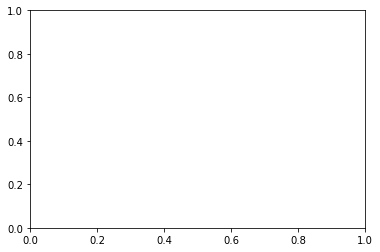

In [13]:
import matplotlib.patches as patches
fig,ax = plt.subplots(1)

#plot snout + bounding boxes for rois
plt.plot(xsnout,ysnout,'.-')

rect = patches.Rectangle(rois['rightside'].topleft,rois['rightside'].bottomright[0]-rois['rightside'].topleft[0],rois['rightside'].bottomright[1]-rois['rightside'].topleft[1],linewidth=1,edgecolor='purple',facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle(rois['leftside'].topleft,rois['leftside'].bottomright[0]-rois['leftside'].topleft[0],rois['leftside'].bottomright[1]-rois['leftside'].topleft[1],linewidth=1,edgecolor='orange',facecolor='none')
ax.add_patch(rect)
plt.ylim(-11,491)
plt.show()

In [14]:
import time_in_each_roi #the function needs to be in the same folder as the notebook

res = time_in_each_roi.get_timeinrois_stats(bp_tracking.T, rois, fps=30)

#print results:
res

NameError: name 'bp_tracking' is not defined